In [ ]:
# Importing necessary libraries
import csv  # For reading CSV files
import tensorflow as tf  # For building and training the model
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
from tensorflow.keras.preprocessing.text import Tokenizer  # For text tokenization
from tensorflow.keras.preprocessing.sequence import pad_sequences  # For padding sequences
from tensorflow.keras.models import Sequential  # For creating a sequential model
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional, SimpleRNN  # Various neural network layers

import nltk  # Natural Language Toolkit for NLP tasks
nltk.download('stopwords')  # Download the stopwords dataset
from nltk.corpus import stopwords  # Importing stopwords from nltk
STOPWORDS = set(stopwords.words('english'))  # Defining a set of English stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Define parameters for text processing and model configuration
vocab_size = 5000  # The maximum number of unique words to be considered in the vocabulary
embedding_dim = 64  # The dimensionality of the dense embedding layer for word vectors
max_length = 200  # The maximum length of input sequences (i.e., the number of words in each input text)
oov_tok = '<OOV>'  # Token to represent words that are out of vocabulary (not in the training data)
training_portion = 0.8  # The proportion of the dataset to be used for training (80% for training, 20% for validation)


In [ ]:
# Initialize lists to store articles and their corresponding labels
articles = []  # To hold the article text
labels = []    # To hold the labels (categories) of the articles

# Open the CSV file containing the BBC text data
with open("/content/bbc-text.csv", 'r') as csvfile:
    # Create a CSV reader object to read the file
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)  # Skip the header row of the CSV file
    # Iterate over each row in the CSV
    for row in reader:
        labels.append(row[0])  # Add the label (first column) to the labels list
        article = row[1]  # Get the article text (second column)

        # Remove stopwords from the article text
        for word in STOPWORDS:
            token = ' ' + word + ' '  # Create a token for the stopword with spaces
            article = article.replace(token, ' ')  # Replace stopword with a space
            article = article.replace('  ', ' ')  # Remove extra spaces created by the replacement

        articles.append(article)  # Append the cleaned article to the articles list


In [ ]:
# Get the number of labels and articles
len(labels), len(articles)


(2225, 2225)

In [ ]:
labels[0],articles[0]

('tech',
 'tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. people forward wind adverts  also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite

In [ ]:
# Calculate the size of the training set
train_size = int(len(articles) * training_portion)  # Determine the number of articles to use for training

# Split the articles and labels into training and validation sets
train_articles = articles[0: train_size]  # Select the first 'train_size' articles for training
train_labels = labels[0: train_size]      # Select the corresponding labels for the training articles

# The remaining articles and labels are used for validation
validation_articles = articles[train_size:]  # Select articles from 'train_size' to the end for validation
validation_labels = labels[train_size:]      # Select the corresponding labels for the validation articles


In [ ]:
print('train_articles' ,len(train_articles))
print('train_labels', len(train_labels))
print('validation_articles', len(validation_articles))
print('validation_labels', len(validation_labels))

train_articles 1780
train_labels 1780
validation_articles 445
validation_labels 445


In [ ]:
# Initialize the Tokenizer to process text data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# num_words: The maximum number of words to keep, based on word frequency.
# oov_token: Token to represent words that are out of vocabulary (not in the training data).

# Fit the tokenizer on the training articles
tokenizer.fit_on_texts(train_articles)
# This step creates the word index and prepares the tokenizer for converting texts to sequences.

# Retrieve the word index created by the tokenizer
word_index = tokenizer.word_index
# The word_index is a dictionary mapping words to their unique integer indices based on frequency.


In [ ]:
word_index

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10,
 'could': 11,
 'last': 12,
 'first': 13,
 'time': 14,
 'two': 15,
 'government': 16,
 'world': 17,
 'uk': 18,
 'best': 19,
 'years': 20,
 'make': 21,
 'film': 22,
 'told': 23,
 'made': 24,
 'get': 25,
 'music': 26,
 'game': 27,
 'like': 28,
 'back': 29,
 'many': 30,
 '000': 31,
 'labour': 32,
 'three': 33,
 'well': 34,
 '1': 35,
 'next': 36,
 'bbc': 37,
 'take': 38,
 'set': 39,
 'number': 40,
 'added': 41,
 'way': 42,
 'market': 43,
 '2': 44,
 'company': 45,
 'may': 46,
 'says': 47,
 'election': 48,
 'home': 49,
 'party': 50,
 'good': 51,
 'going': 52,
 'much': 53,
 'work': 54,
 '2004': 55,
 'still': 56,
 'win': 57,
 'show': 58,
 'think': 59,
 'games': 60,
 'go': 61,
 'top': 62,
 'second': 63,
 'million': 64,
 '6': 65,
 'england': 66,
 'firm': 67,
 'since': 68,
 'week': 69,
 'say': 70,
 'play': 71,
 'part': 72,
 'public': 73,
 'use': 74,
 'blair': 75,
 '3': 76,
 'want'

In [ ]:
# Use the tokenizer to convert the given text into sequences of integers
# The input is a list containing a single string: 'the cat sat on my table'
sequences = tokenizer.texts_to_sequences(['the cat sat on my table'])

# Print the resulting sequences
print(sequences)
# The output will be a list of lists, where each inner list contains the integer indices
# corresponding to the words in the input text, based on the word index created during fitting.


[[1148, 1, 1, 576, 1, 2201]]

In [ ]:
# Convert the list of training articles into sequences of integers
train_sequences = tokenizer.texts_to_sequences(train_articles)

# Get the length of the resulting sequences
length_of_sequences = len(train_sequences)

# Print the length of the train_sequences to see how many articles were converted
print(length_of_sequences)


1780

In [ ]:
train_sequences[0]

[91,
 160,
 1141,
 1106,
 49,
 979,
 755,
 1,
 89,
 1304,
 4288,
 129,
 175,
 3653,
 1215,
 1196,
 1579,
 42,
 7,
 893,
 91,
 1,
 334,
 85,
 20,
 14,
 130,
 3262,
 1216,
 2422,
 569,
 451,
 1376,
 58,
 3378,
 3521,
 1662,
 8,
 921,
 730,
 10,
 844,
 1,
 9,
 597,
 1580,
 1107,
 395,
 1941,
 1106,
 731,
 49,
 537,
 1398,
 2011,
 1625,
 134,
 249,
 113,
 2356,
 795,
 4979,
 980,
 583,
 10,
 3957,
 3958,
 921,
 2563,
 129,
 344,
 175,
 3653,
 1,
 1,
 39,
 62,
 2867,
 28,
 9,
 4722,
 18,
 1305,
 136,
 416,
 7,
 143,
 1423,
 71,
 4500,
 436,
 4980,
 91,
 1107,
 77,
 1,
 82,
 2012,
 53,
 1,
 91,
 6,
 1008,
 609,
 89,
 1304,
 91,
 1964,
 131,
 137,
 420,
 9,
 2868,
 38,
 152,
 1234,
 89,
 1304,
 4723,
 7,
 436,
 4980,
 3154,
 6,
 2493,
 1,
 431,
 1126,
 1,
 1424,
 570,
 1235,
 1903,
 1,
 766,
 9,
 537,
 1398,
 2011,
 134,
 2069,
 400,
 845,
 1965,
 1603,
 34,
 1718,
 2869,
 1,
 1,
 2423,
 244,
 9,
 2625,
 82,
 732,
 6,
 1173,
 1197,
 152,
 720,
 590,
 1,
 124,
 28,
 1305,
 1691,
 432,
 83,
 93

In [ ]:
# Pad the sequences to ensure uniform length
# This will make all sequences in train_sequences the same length (max_length)
train_padded = pad_sequences(train_sequences, maxlen=max_length)

# The resulting train_padded will be a 2D array where each sequence is padded with zeros
# to the specified max_length. Shorter sequences will be padded at the beginning or the end,
# depending on the padding configuration (default is 'pre').


In [ ]:
len(train_padded),len(train_padded[0])

(1780, 200)

In [ ]:
# Convert the list of validation articles into sequences of integers
validation_sequences = tokenizer.texts_to_sequences(validation_articles)

# Pad the sequences to ensure uniform length for validation set
# This will make all sequences in validation_sequences the same length (max_length)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length)

# The resulting validation_padded will be a 2D array where each sequence is padded with zeros
# to the specified max_length. Shorter sequences will be padded at the beginning or the end,
# depending on the padding configuration (default is 'pre').


In [ ]:
set(labels)

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [ ]:
# Initialize a new Tokenizer for the labels
label_tokenizer = Tokenizer()

# Fit the label tokenizer on the provided labels to create a mapping of labels to unique integer indices
label_tokenizer.fit_on_texts(labels)

# Convert the training labels into sequences of integers
# This will replace each label with its corresponding index from the label_tokenizer's word index
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))

# Convert the validation labels into sequences of integers in the same way
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))


In [ ]:
train_labels[0], training_label_seq[0]

('tech', array([4]))

In [ ]:
# Initialize a sequential model for building the neural network
model = Sequential()

# Add an Embedding layer to map integer sequences to dense vectors of fixed size
# vocab_size: size of the vocabulary (number of unique words)
# embedding_dim: size of the vector for each word
model.add(Embedding(vocab_size, embedding_dim))

# Add a Dropout layer to prevent overfitting
# This layer randomly sets a fraction (0.5 in this case) of the input units to 0 at each update during training
model.add(Dropout(0.5))

# Add a Bidirectional LSTM layer for processing sequences
# This layer allows the model to learn from both past (forward) and future (backward) context in the input data
model.add(Bidirectional(LSTM(embedding_dim)))

# Add a Dense layer for the output with 6 units corresponding to the number of classes
# activation='softmax': this activation function outputs probabilities for each class
model.add(Dense(6, activation='softmax'))

# Print the summary of the model to see the architecture and the total number of parameters
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
Total params: 386,822
Trainable params: 386,822
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define the Adam optimizer with specified learning rate and decay
# lr: learning rate, which determines the step size during optimization
# decay: learning rate decay over each update
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

# Compile the model with the specified loss function, optimizer, and evaluation metrics
# loss='sparse_categorical_crossentropy': appropriate for multi-class classification where the labels are integers
# optimizer=opt: uses the Adam optimizer defined above
# metrics=['accuracy']: track accuracy as a performance metric during training and evaluation
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Set the number of epochs for training
num_epochs = 20

# Fit the model to the training data
# train_padded: padded sequences of training articles
# training_label_seq: integer-encoded training labels
# epochs=num_epochs: specify the number of times the model will go through the entire training dataset
# validation_data: a tuple containing the validation data (padded validation sequences and validation labels)
# verbose=2: controls the verbosity of the output during training (2 provides a progress bar and per-epoch results)
history = model.fit(
    train_padded,
    training_label_seq,
    epochs=num_epochs,
    validation_data=(validation_padded, validation_label_seq),
    verbose=2
)


Epoch 1/20
56/56 - 15s - loss: 1.6095 - accuracy: 0.2669 - val_loss: 1.4783 - val_accuracy: 0.3596
Epoch 2/20
56/56 - 11s - loss: 1.3380 - accuracy: 0.4298 - val_loss: 1.2564 - val_accuracy: 0.4674
Epoch 3/20
56/56 - 11s - loss: 1.1451 - accuracy: 0.5084 - val_loss: 1.0016 - val_accuracy: 0.6539
Epoch 4/20
56/56 - 11s - loss: 0.7093 - accuracy: 0.7500 - val_loss: 0.6436 - val_accuracy: 0.8045
Epoch 5/20
56/56 - 11s - loss: 0.4388 - accuracy: 0.8500 - val_loss: 0.4875 - val_accuracy: 0.7888
Epoch 6/20
56/56 - 11s - loss: 0.2755 - accuracy: 0.9303 - val_loss: 0.3627 - val_accuracy: 0.8719
Epoch 7/20
56/56 - 11s - loss: 0.1957 - accuracy: 0.9421 - val_loss: 0.3161 - val_accuracy: 0.9079
Epoch 8/20
56/56 - 11s - loss: 0.0958 - accuracy: 0.9831 - val_loss: 0.2316 - val_accuracy: 0.9348
Epoch 9/20
56/56 - 11s - loss: 0.1422 - accuracy: 0.9612 - val_loss: 0.3213 - val_accuracy: 0.9011
Epoch 10/20
56/56 - 11s - loss: 0.0861 - accuracy: 0.9882 - val_loss: 0.3309 - val_accuracy: 0.8944
Epoch 11/

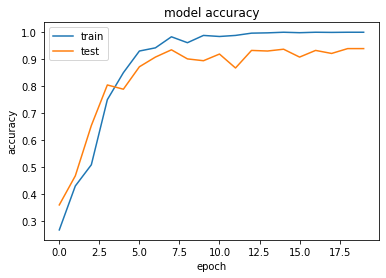

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

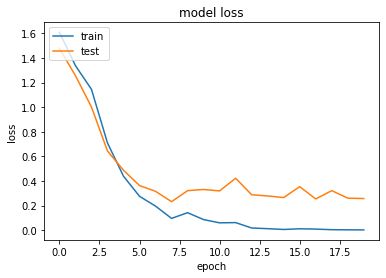

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# Define the input text for prediction
txt = [
    "blair prepares to name poll date tony blair is likely to name 5 may as election day when parliament returns from its easter break the bbc s political editor has learned. andrew marr says mr blair will ask the queen on 4 or 5 april to dissolve parliament at the end of that week. mr blair has so far resisted calls for him to name the day but all parties have stepped up campaigning recently. downing street would not be drawn on the claim saying election timing was a matter for the prime minister. a number 10 spokeswoman would only say: he will announce an election when he wants to announce an election. the move will signal a frantic week at westminster as the government is likely to try to get key legislation through parliament. the government needs its finance bill covering the budget plans to be passed before the commons closes for business at the end of the session on 7 april. but it will also seek to push through its serious and organised crime bill and id cards bill. mr marr said on wednesday s today programme: there s almost nobody at a senior level inside the government or in parliament itself who doesn t expect the election to be called on 4 or 5 april. as soon as the commons is back after the short easter recess tony blair whips up to the palace asks the queen to dissolve parliament ... and we re going. the labour government officially has until june 2006 to hold general election but in recent years governments have favoured four-year terms."
]

# Convert the input text to sequences using the tokenizer
seq = tokenizer.texts_to_sequences(txt)

# Pad the sequences to ensure they are of consistent length for the model input
padded = pad_sequences(seq, maxlen=max_length)

# Use the model to predict the class probabilities for the padded input
pred = model.predict(padded)

# Define the labels corresponding to the classes
labels = ['sport', 'business', 'politics', 'tech', 'entertainment']

# Print the predicted probabilities for each class
print(pred)

# Get the index of the class with the highest predicted probability
predicted_class_index = np.argmax(pred)

# Print the index of the predicted class and the corresponding label
print(predicted_class_index)

# Since the label array is 1-indexed in the original label encoding,
# print the predicted label using the predicted class index (adjusted by -1)
print(labels[predicted_class_index - 1])


[[4.4398483e-05 1.4972918e-03 9.6852600e-04 9.9605501e-01 6.8534439e-04
  7.4936450e-04]]
3
politics


In [ ]:
# Define the input text for prediction
txt = [
    "call to save manufacturing jobs the trades union congress (tuc) is calling on the government to stem job losses in manufacturing firms by reviewing the help it gives companies. the tuc said in its submission before the budget that action is needed because of 105 000 jobs lost from the sector over the last year. it calls for better pensions child care provision and decent wages. the 36-page submission also urges the government to examine support other european countries provide to industry. tuc general secretary brendan barber called for a commitment to policies that will make a real difference to the lives of working people. greater investment in childcare strategies and the people delivering that childcare will increase the options available to working parents he said. a commitment to our public services and manufacturing sector ensures that we can continue to compete on a global level and deliver the frontline services that this country needs. he also called for practical measures to help pensioners especially women who he said are most likely to retire in poverty. the submission also calls for decent wages and training for people working in the manufacturing sector."
]

# Convert the input text to sequences using the tokenizer
seq = tokenizer.texts_to_sequences(txt)

# Pad the sequences to ensure they are of consistent length for the model input
padded = pad_sequences(seq, maxlen=max_length)

# Use the model to predict the class probabilities for the padded input
pred = model.predict(padded)

# Define the labels corresponding to the classes
labels = ['sport', 'business', 'politics', 'tech', 'entertainment']

# Print the predicted probabilities for each class
print(pred)

# Get the index of the class with the highest predicted probability
predicted_class_index = np.argmax(pred)

# Print the index of the predicted class and the corresponding label
print(predicted_class_index)

# Since the label array is 1-indexed in the original label encoding,
# print the predicted label using the predicted class index (adjusted by -1)
print(labels[predicted_class_index - 1])


[[6.5575330e-07 1.8874918e-04 9.9888569e-01 2.8777248e-04 5.2698520e-06
  6.3185213e-04]]
2
bussiness
